<a href="https://colab.research.google.com/github/advcloud/colabtest/blob/main/facecam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url = "http://.ngrok.io/predict"

In [1]:
!git clone https://github.com/advcloud/colablib1.git

Cloning into 'colablib1'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [2]:
%cd colablib1

/content/colablib1


In [3]:
import webcam

<IPython.core.display.Javascript object>

(480, 640)
Saved to claireye.jpg


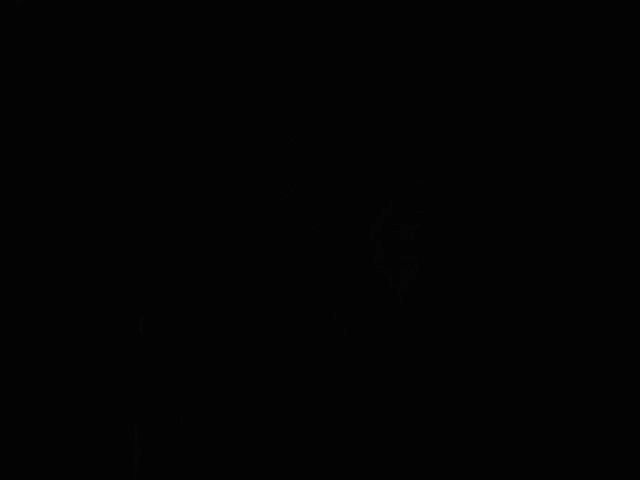

In [4]:

try:
  filename = webcam.take_photo(webcam.ifile_path)
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  webcam.display(webcam.Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))


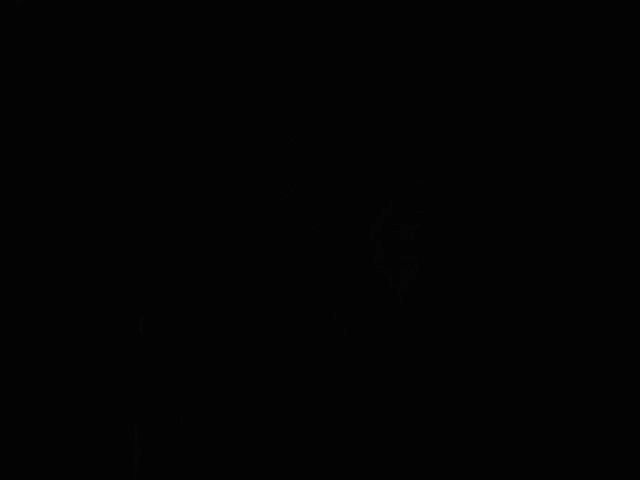

In [10]:
from IPython import display
display.Image(webcam.ifile_path)

In [7]:
file_name=webcam.ifile_path.split('/')[-1]
file=open(webcam.ifile_path,'rb')
files = {'file':(file_name,file,'image/jpg')}
r = webcam.requests.post(url,files = files)
result = r.content
img = webcam.base64.b64decode(result)
file = open(webcam.ofile_path,'wb')
file.write(img)
file.close()


In [8]:
display.Image(webcam.ofile_path)

In [ ]:
im_cv = webcam.cv2.imread(webcam.ofile_path)
im_rgb = webcam.cv2.cvtColor(im_cv, webcam.cv2.COLOR_BGR2RGB)
webcam.imwrite(webcam.ofile_path, im_rgb)
display.Image(webcam.ofile_path)